<h1>WINE QUALITY PREDICTION</h1>
<p>On this kernel, i will compare 5 classification models performance on wine quality dataset<p>
author: Muhammad Shafa Praramadhana


<h2>Variable explanation of the dataset</h2>

|Feature|Explain|
|-------|-------|
|**fixed acidity**|most acids involved with wine or fixed or nonvolatile|
|**volatile acidity**|the amount of acetic acid in wine|
|**citric acid**|the amount of citric acid in wine|
|**residual sugar**|the amount of sugar remaining after fermentation stops|
|**chlorides**|the amount of salt in the wine.|
|**free sulfur dioxide**|the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties)|
|**total sulfur dioxide**|amount of free and bound forms of SO2|
|**density**|the measurement of how tightly a material is packed together|
|**PH**|describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4|
|**Alcohol**|the percent alcohol content of the wine|
|**quality**|output variable (based on sensory data, score between 3 and 8)|

<h2>Import libraries</h2>

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
import warnings

warnings.filterwarnings('ignore')

<h2>Import dataset</h2>

In [214]:
df = pd.read_csv('winequality-red.csv')

<h2>Exploratory data analysis</h2>

In [215]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [216]:
df.shape

(1599, 12)

In [217]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [219]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<p>We can see that there is no null value in the dataset</p>

In [220]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [221]:
df.rename(columns = {'fixed acidity': 'fixed_acidity',
                     'volatile acidity': 'volatile_acidity',
                     'citric acid': 'citric_acid',
                     'residual sugar': 'residual_sugar',
                     'free sulfur dioxide': 'free_sulfur_dioxide',
                     'total sulfur dioxide': 'total_sulfur_dioxide'})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


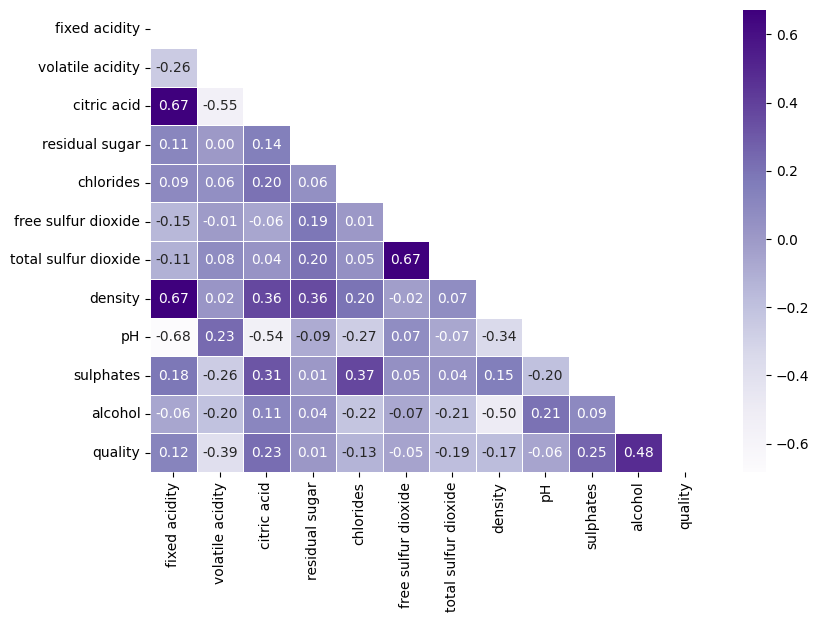

In [222]:
corr = df.corr()

plt.figure(figsize = (9, 6))
sns.heatmap(corr, annot = True, linewidth = 0.5, cmap = 'Purples', fmt = '.2f', mask = np.triu(corr))
plt.show()

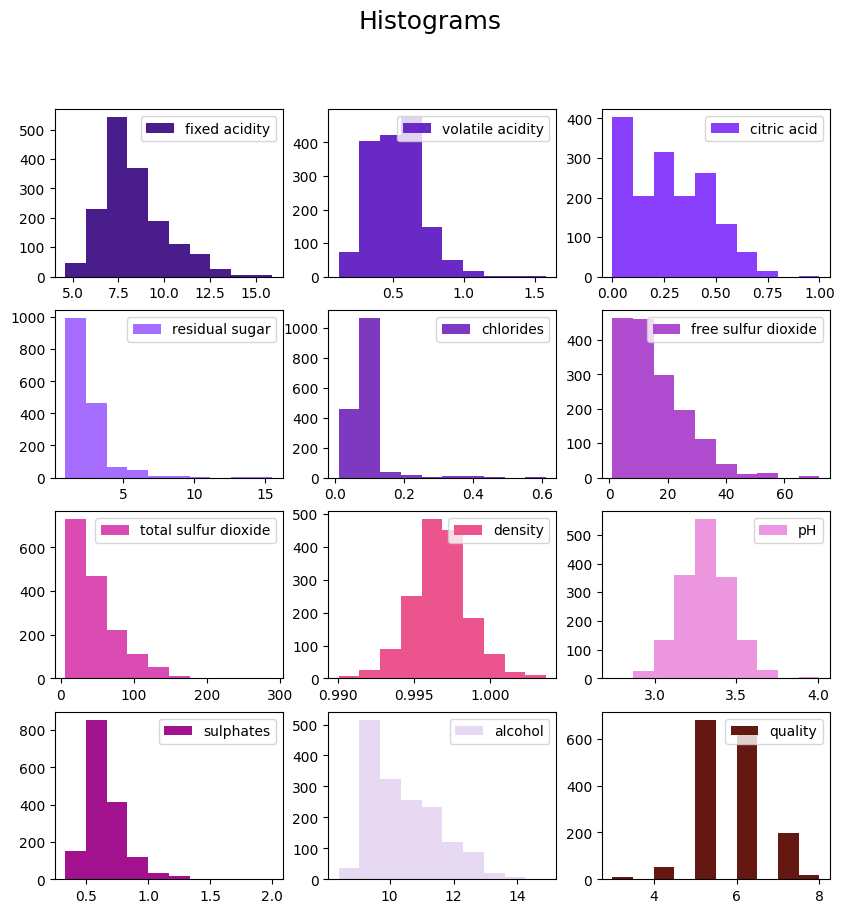

In [223]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 10))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for i, c in enumerate(df.columns):
  ax = axes.flatten()[i]
  ax.hist(df[c], color = colors[i], label = c)
  ax.legend(loc = "best")

plt.suptitle('Histograms', size = 18)
plt.show()


<h2>Replace value in quality column to 3 (good), 2 (middle) and 1 (bad)

In [224]:
df = df.replace({'quality': {8: 3, 7: 3, 6: 2, 5: 2, 4: 1, 3: 1}})

<h2>Select dependent and independent variables</h2>

In [225]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<h2>Split training and testing set</h2>

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

<h2>Apply normalization to normalize values in the dataset </h2>

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>GaussianNB</h2>

In [228]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [230]:
nb_score = accuracy_score(y_test, nb_y_pred)
print(f'GaussianNB accuracy: {nb_score}')

GaussianNB accuracy: 0.803125


<h2>KNeighborsClassifer

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, cv = 10, param_grid = parameters)
knn_cv.fit(X_train, y_train)

print('Best hyperparameters: ', knn_cv.best_params_)
print('Accuracy: ', knn_cv.best_score_)

Best hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Accuracy:  0.8655265748031497


In [232]:
knn = KNeighborsClassifier(**knn_cv.best_params_)

knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

knn_score = accuracy_score(y_test, knn_y_pred)
print('KNeighborsClassifier accuracy: ', knn_score)

KNeighborsClassifier accuracy:  0.88125


<h2>RandomForestClassifier</h2>

In [233]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators' : [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, cv = 10, param_grid = parameters)
rf_cv.fit(X_train, y_train)

print('Best hyperparameters: ', knn_cv.best_params_)
print('Accuracy: ', knn_cv.best_score_)

Best hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Accuracy:  0.8655265748031497


In [234]:
rf = RandomForestClassifier(**rf_cv.best_params_)

rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

rf_score = accuracy_score(y_test, rf_y_pred)
print('RandomForestClassifer accuracy: ', rf_score)

RandomForestClassifer accuracy:  0.878125


<h2>SVC</h2>

In [235]:
from sklearn.svm import SVC

parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 'scale', 'auto']
}

svc = SVC()
svc_cv = GridSearchCV(estimator = svc, cv = 10, param_grid = parameters)
svc_cv.fit(X_train, y_train)

print('Best hyperparameters: ', svc_cv.best_params_)
print('Accuracy: ', svc_cv.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 100}
Accuracy:  0.865538877952756


In [236]:
svc = SVC(**svc_cv.best_params_)

svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

svc_score = accuracy_score(y_test, svc_y_pred)
print('SVC accuracy: ', svc_score)

SVC accuracy:  0.875


<h2>DecisionTreeClassifier</h2>

In [237]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(np.arange(4, 30))
}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(estimator = dt, cv = 10, param_grid = parameters)
dt_cv.fit(X_train, y_train)

print('Best hyperparameters: ', dt_cv.best_params_)
print('Accuracy: ', dt_cv.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
Accuracy:  0.8499015748031497


In [238]:
dt = DecisionTreeClassifier(**dt_cv.best_params_)

dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

dt_score = accuracy_score(y_test, svc_y_pred)
print('DecisionTreeClassifier accuracy: ', dt_score)

DecisionTreeClassifier accuracy:  0.875


<h2>Comparing all models</h2>

In [239]:
result = pd.DataFrame({
    'Algorithm': ['GaussianNB', 'KNeighborClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifer'],
    'Score': [nb_score, knn_score, rf_score, svc_score, dt_score]
})

result.sort_values(by = 'Score', inplace = True)

In [240]:
sns.set_palette('Purples')

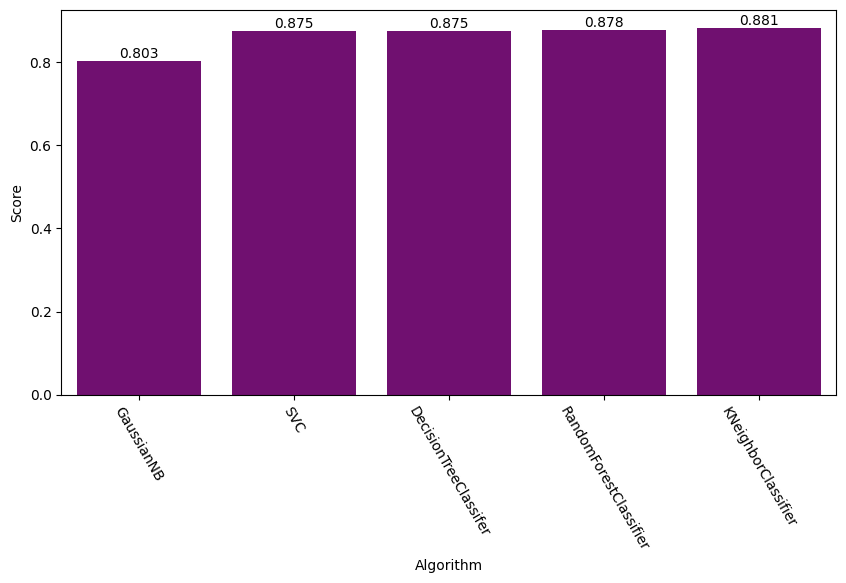

In [241]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.barplot(x = 'Algorithm', y = 'Score', data = result, color = 'purple')
ax.bar_label(ax.containers[0], fmt = "%.3f")
ax.set_xticklabels(labels = result.Algorithm, rotation = 300)

plt.show()